NNDL Assignment - 1

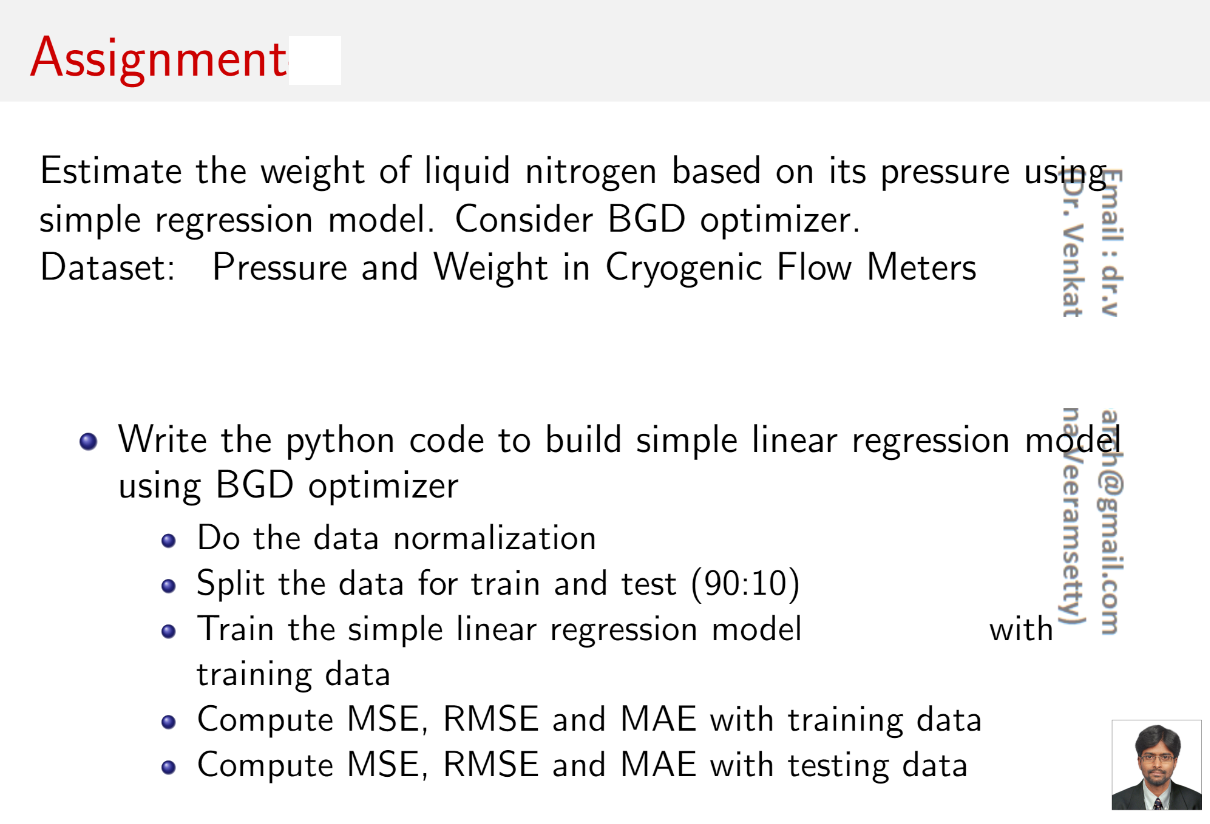

In [46]:
from PIL import Image
img = Image.open('Assignment-1 Q.png')
img

Importing Packages

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Reading the Data

In [48]:
data = pd.read_excel('Assignment1.xlsx')
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


Normalizing the Data

In [49]:
Xmax = np.max(data['X'])
Xmin = np.min(data['X'])
Ymax = np.max(data['Y'])
Ymin = np.min(data['Y'])
data['X'] = (data['X'] - Xmin) / (Xmax - Xmin)
data['Y'] = (data['Y'] - Ymin) / (Ymax - Ymin)
data.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


Splitting the Data into Training and Testing

In [50]:
x = data['X']
y = data['Y']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.1, random_state=101)

Calculating the Gradients and Training the model

In [51]:
m = np.random.uniform(-50, 50)
c = np.random.uniform(-50, 50)
eta = 0.5
epochs = 500

# Loop for epochs
for _ in range(epochs):
    
    # Calculating Gradient M
    gm = -sum([(Ytrain.iloc[i] - m * Xtrain.iloc[i] - c) * Xtrain.iloc[i] for i in range(Xtrain.shape[0])])
    gm /= Xtrain.shape[0]
    
    # Calculating Gradient C
    gc = -sum([(Ytrain.iloc[i] - m * Xtrain.iloc[i] - c) for i in range(Xtrain.shape[0])])
    gc /= Xtrain.shape[0]
    
    # Updating m and c values
    c += - eta * gc
    m += - eta * gm

# Print model parameters after training
print(f'm = {m}\nc = {c}')

m = -0.15335570327690937
c = 0.6967046123649973


Calculting the Predictions

In [52]:
train_pred = [m * Xtrain.iloc[i] + c for i in range(Xtrain.shape[0])]
test_pred = [m * Xtest.iloc[i] + c for i in range(Xtest.shape[0])]

Denormalization of Data

In [53]:
train_pred = [i * (Ymax - Ymin) + Ymin for i in train_pred]
test_pred = [i * (Ymax - Ymin) + Ymin for i in test_pred]
trainY = [i * (Ymax - Ymin) + Ymin for i in Ytrain]
testY = [i * (Ymax - Ymin) + Ymin for i in Ytest]

Error Metrics

In [54]:
# Training Error Calculation
training_MAE = sum([abs(train_pred[i] - trainY[i]) for i in range(len(trainY))]) / len(trainY)
training_MSE = sum([(train_pred[i] - trainY[i]) ** 2 for i in range(len(trainY))]) / len(trainY)
training_RMSE = training_MSE ** 0.5
print('Training Error :')
print(f'MAE : {training_MAE}')
print(f'MSE : {training_MSE}')
print(f'RMSE : {training_RMSE}')

# Testing Error Calculation
testing_MAE = sum([abs(test_pred[i] - testY[i]) for i in range(len(testY))]) / len(testY)
testing_MSE = sum([(test_pred[i] - testY[i]) ** 2 for i in range(len(testY))]) / len(testY)
testing_RMSE = testing_MSE ** 0.5
print('Testing Error :')
print(f'MAE : {testing_MAE}')
print(f'MSE : {testing_MSE}')
print(f'RMSE : {testing_RMSE}')

Training Error :
MAE : 26.710059724900113
MSE : 1532.8193422774202
RMSE : 39.151236791159235
Testing Error :
MAE : 19.05253935248705
MSE : 532.451725646748
RMSE : 23.074915506817092


Actual Values and Predicted Values in Training Data

In [55]:
pd.DataFrame({'Actual' : trainY, 'Predicted':train_pred})

,Actual,Predicted
0,508.6,504.753768
1,570.9,514.377210
2,510.0,517.478603
3,513.4,520.078301
4,506.3,524.639174
5,512.8,520.215127
6,504.3,516.383994
7,496.4,521.172910
8,578.6,502.564549
9,577.0,520.944867


Actual Values and Predicted Values in Testing Data

In [56]:
pd.DataFrame({'Actual' : testY, 'Predicted':test_pred})

,Actual,Predicted
0,505.4,514.422818
1,510.8,500.101677
2,563.9,526.463523


Deployment

In [57]:
x = float(input('Enter the pressure of liquid nitrogen : '))
x = (x - Xmin) / (Xmax - Xmin)
prediction = m * x + c
prediction = (prediction * (Ymax - Ymin)) + Ymin
print('Predicted Weight :', prediction)

Predicted Weight : 451.7564246748396
